# **1. Perkenalan Dataset**


**Students' Social Network Profile Dataset**  

Dataset ini berisi sampel acak dari 15.000 siswa SMA yang memiliki profil di platform media sosial populer pada periode 2006 hingga 2009. Data ini dikumpulkan secara merata selama tahun-tahun tersebut dan memberikan wawasan berharga tentang aktivitas dan minat online para remaja pada masa itu.  

Data diperoleh melalui proses *crawling* profil di media sosial dan diolah menggunakan teknik *text mining* untuk mengekstrak informasi tentang minat siswa. Secara khusus, dataset ini mencatat jumlah kemunculan 37 kata dominan dalam profil mereka, seperti "football" dan "shopping," yang mencerminkan topik-topik yang sering dibahas oleh populasi siswa tersebut.  

Selain data terkait minat, dataset ini juga mencakup informasi demografis penting dari setiap siswa, seperti:  
- **Tahun kelulusan** (gradyear)  
- **Jenis kelamin** (gender)  
- **Usia** saat survei dilakukan  
- **Jumlah teman** mereka di platform media sosial (NumberOfFriends)  

# **2. Import Library**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import ColumnTransformer

# **3. Memuat Dataset**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Student_Social_Network.csv to Student_Social_Network.csv


In [6]:
# Memuat dataset
data = pd.read_csv('Student_Social_Network.csv')

In [7]:
# Menampilkan beberapa baris awal untuk memeriksa dataset
data.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,...,0,0,0,3,0,0,0,0,0,0


In [8]:
print("Dataset Overview:")
data.info()

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot          

# **4. Exploratory Data Analysis (EDA)**

In [9]:
# Memeriksa jumlah baris dan kolom dalam dataset
print(f'Jumlah baris dan kolom: {data.shape}')

Jumlah baris dan kolom: (15000, 40)


In [10]:
# Mengecek nilai yang hilang (missing values) di setiap kolom
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 gradyear              0
gender             1337
age                2496
NumberOffriends       0
basketball            0
football              0
soccer                0
softball              0
volleyball            0
swimming              0
cheerleading          0
baseball              0
tennis                0
sports                0
cute                  0
sex                   0
sexy                  0
hot                   0
kissed                0
dance                 0
band                  0
marching              0
music                 0
rock                  0
god                   0
church                0
jesus                 0
bible                 0
hair                  0
dress                 0
blonde                0
mall                  0
shopping              0
clothes               0
hollister             0
abercrombie           0
die                   0
death                 0
drunk                 0
drugs                 0
dtype: int64


In [12]:
# Menampilkan statistik deskriptif dataset
data.describe(include='all')

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,13663,12504,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,NaN,2,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,F,16. Jun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,11057,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2007.496933,NaN,NaN,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,...,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,NaN,NaN,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,...,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,NaN,NaN,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,NaN,NaN,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,NaN,NaN,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,NaN,NaN,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


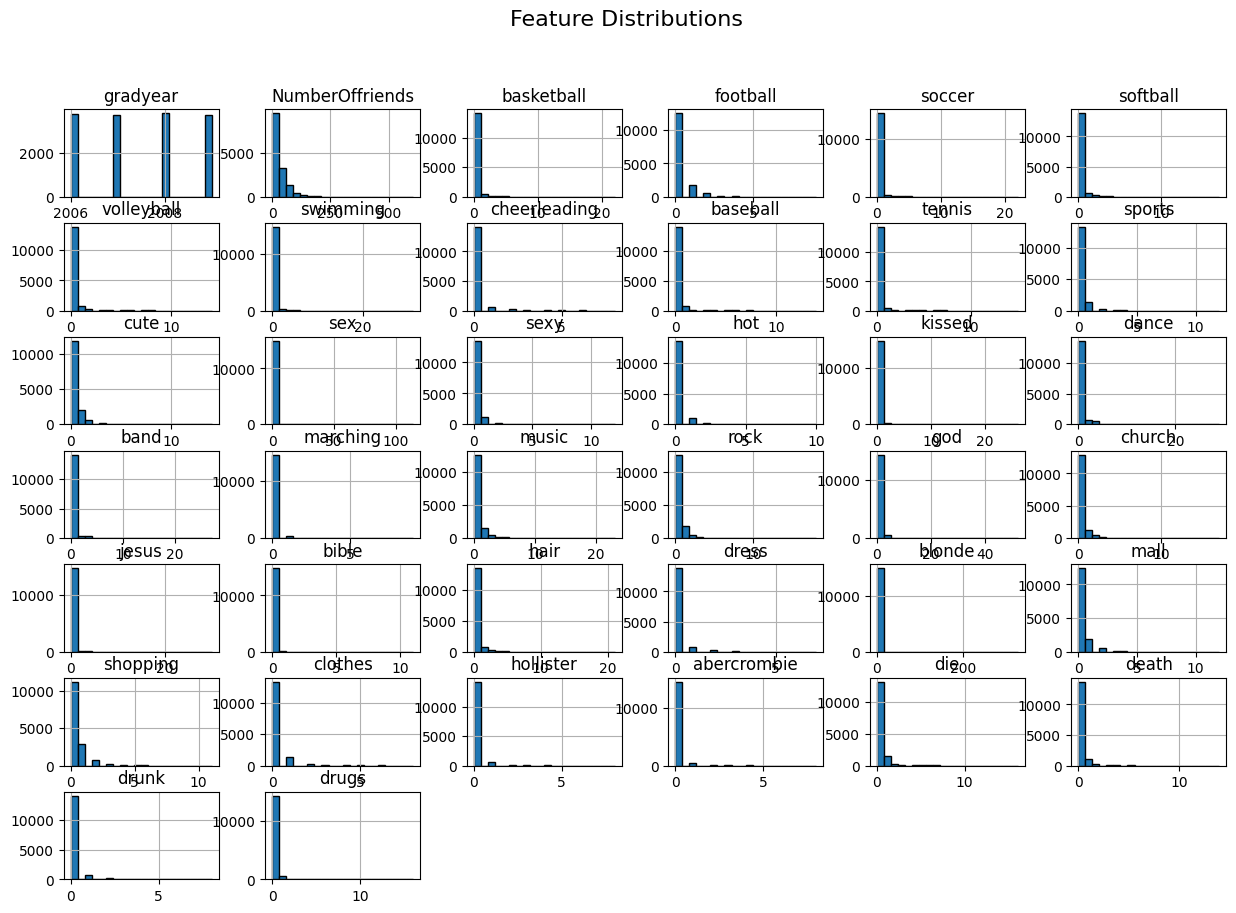

In [13]:
# Visualisasi distribusi fitur numerik menggunakan histogram
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

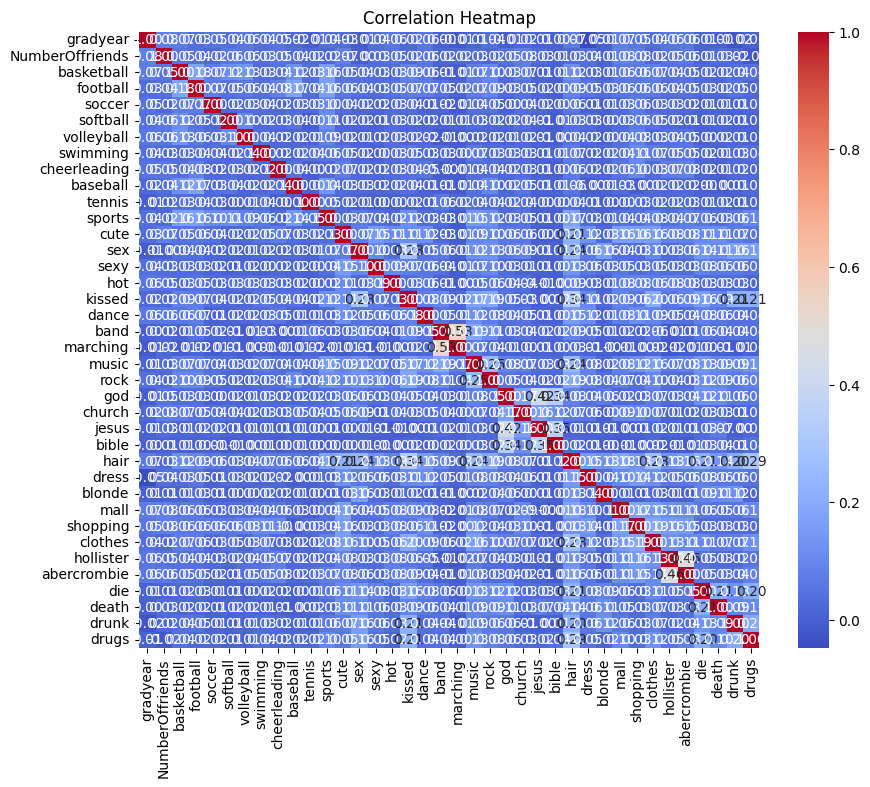

In [14]:
# Memilih kolom numerik untuk analisis korelasi
numeric_data = data.select_dtypes(include=[np.number])

# Memastikan kolom numerik tersedia sebelum membuat heatmap korelasi
if not numeric_data.empty:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
else:
    print("Tidak ada kolom numerik untuk membuat heatmap korelasi.")

# **5. Data Preprocessing**

In [15]:
# Menghapus baris dengan nilai yang hilang
data = data.dropna()

In [16]:
# Mengidentifikasi kolom numerik dan kategorikal
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

In [17]:
# Membuat pipeline preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # Normalisasi fitur numerik
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # One-hot encoding untuk fitur kategorikal
    ]
)

In [18]:
# Menerapkan preprocessing ke dataset
processed_data = preprocessor.fit_transform(data)

In [19]:
# Opsional: Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_data)

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [20]:
# Menerapkan K-Means dengan berbagai jumlah cluster (2 hingga 10)
silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    score = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(score)

## **b. Evaluasi Model Clustering**

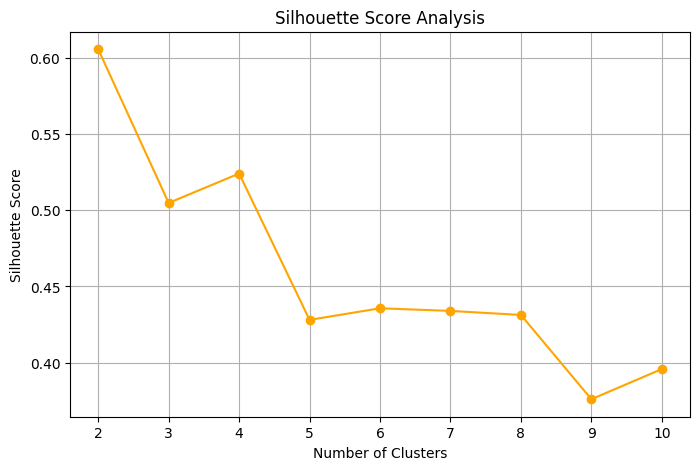

Optimal Number of Clusters: 2


In [21]:
# Visualisasi silhouette score untuk mengevaluasi jumlah cluster optimal
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='orange')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Memilih jumlah cluster optimal berdasarkan silhouette score tertinggi
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
print(f"Optimal Number of Clusters: {optimal_clusters}")

## **c. Visualisasi Hasil Clustering**

In [22]:
# Menerapkan K-Means dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(processed_data)

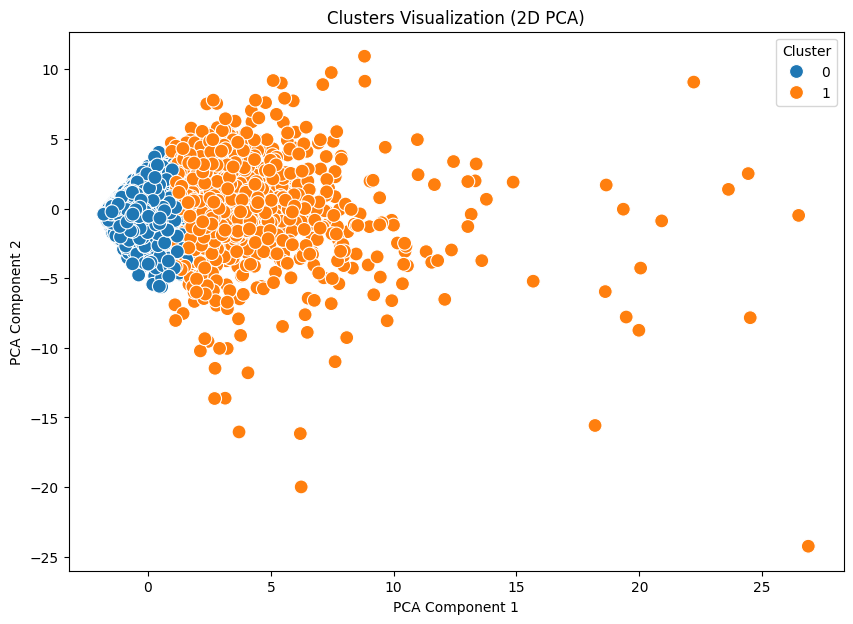

In [23]:
# Visualisasi hasil clustering dalam 2D menggunakan PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='tab10', s=100)
plt.title("Clusters Visualization (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster')
plt.show()

## **d. Analisis dan Interpretasi Hasil Cluster**

In [25]:
# Menganalisis setiap cluster secara mendetail
for cluster in range(optimal_clusters):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster} Analysis:")
    print(cluster_data.describe(include='all'))


Cluster 0 Analysis:
            gradyear gender     age  NumberOffriends    basketball  \
count   10230.000000  10230   10230     10230.000000  10230.000000   
unique           NaN      2    1849              NaN           NaN   
top              NaN      F  17.399              NaN           NaN   
freq             NaN   8061      19              NaN           NaN   
mean     2007.439101    NaN     NaN        28.716618      0.206549   
std         1.119227    NaN     NaN        33.590819      0.618621   
min      2006.000000    NaN     NaN         0.000000      0.000000   
25%      2006.000000    NaN     NaN         4.000000      0.000000   
50%      2007.000000    NaN     NaN        19.000000      0.000000   
75%      2008.000000    NaN     NaN        41.750000      0.000000   
max      2009.000000    NaN     NaN       605.000000      9.000000   

            football        soccer      softball    volleyball      swimming  \
count   10230.000000  10230.000000  10230.000000  10230.00

Berikut adalah interpretasi dari kedua cluster berdasarkan analisis statistik deskriptif :

### **Cluster 1 Analysis**
- **Graduation Year (gradyear):** Mayoritas siswa di cluster ini lulus antara tahun 2006 dan 2009, dengan rata-rata tahun kelulusan adalah **2007.44**.
- **Gender:** Proporsi perempuan (F) sangat dominan di cluster ini (**~80%**).
- **Age:** Data menyebutkan usia teratas (top) adalah **17.4 tahun**, yang menunjukkan cluster ini mencakup siswa sekolah menengah atas pada usia yang umum.
- **Number of Friends:** Rata-rata jumlah teman adalah **28.72**, dengan distribusi yang luas (rentang 0–605).
- **Interests (e.g., basketball, football, shopping):**
  - Kecenderungan untuk aktivitas olahraga cukup rendah, misalnya, rata-rata nilai untuk **basketball (0.21)** dan **football (0.20)** menunjukkan partisipasi terbatas.
  - Aktivitas yang berhubungan dengan belanja lebih tinggi, seperti **shopping (0.27)** dan **mall (0.18)**.
- **Lifestyle and Risky Behaviors:** Aktivitas yang lebih serius atau berisiko, seperti diskusi tentang **drugs (0.02)** dan **drunk (0.05)**, memiliki rata-rata rendah, menunjukkan bahwa cluster ini memiliki minat yang lebih netral dan cenderung tidak terlibat dalam perilaku negatif.

**Kesimpulan:**
Cluster 0 mewakili siswa dengan aktivitas sosial dan minat sedang. Mereka lebih fokus pada aspek yang netral seperti belanja atau sekolah, dengan keterlibatan rendah dalam olahraga kompetitif maupun perilaku berisiko.

### **Cluster 2 Analysis**
- **Graduation Year (gradyear):** Rata-rata tahun kelulusan di cluster ini adalah **2007.72**, sedikit lebih tinggi daripada Cluster 0.
- **Gender:** Seperti Cluster 0, perempuan juga dominan (**~90%**).
- **Age:** Usia rata-rata sedikit lebih muda dibandingkan Cluster 0, dengan usia teratas adalah **16.8 tahun**.
- **Number of Friends:** Rata-rata jumlah teman lebih tinggi di cluster ini (**40.51**), menunjukkan siswa di cluster ini lebih aktif secara sosial.
- **Interests (e.g., basketball, football, shopping):**
  - Cluster ini menunjukkan minat yang lebih tinggi pada olahraga, seperti **basketball (0.67)**, **football (0.60)**, dan **soccer (0.42)**.
  - Aktivitas yang berhubungan dengan belanja lebih menonjol, seperti **shopping (0.91)** dan **mall (0.83)**.
- **Lifestyle and Risky Behaviors:** Perilaku berisiko lebih sering muncul di cluster ini, seperti diskusi tentang **drugs (0.31)**, **drunk (0.33)**, dan **death (0.32)**, menunjukkan kecenderungan yang lebih tinggi terhadap eksplorasi atau keterlibatan dalam diskusi tentang topik-topik ini.

**Kesimpulan:**
Cluster 2 terdiri dari siswa yang lebih sosial dan aktif dalam olahraga serta aktivitas luar seperti belanja. Mereka juga menunjukkan keterlibatan yang lebih tinggi dalam diskusi tentang topik yang lebih serius atau berisiko, menandakan kemungkinan eksplorasi yang lebih luas dalam kehidupan mereka.

**Perbandingan Antar Cluster:**
- Sosial: Cluster 2 lebih aktif secara sosial (jumlah teman lebih banyak) dibanding Cluster 1.
- Olahraga: Cluster 2 lebih berminat pada olahraga dibandingkan Cluster 1.
- Belanja: Kedua cluster memiliki ketertarikan pada belanja, tetapi Cluster 2 menunjukkan intensitas yang lebih tinggi.
- Perilaku Berisiko: Cluster 2 memiliki keterlibatan lebih besar pada topik yang lebih serius seperti drugs, drunk, dan death, sedangkan Cluster 0 lebih netral.

# **7. Mengeksport Data**

In [28]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Simpan ke Google Drive
data.to_csv('/content/drive/My Drive/hasil_clustering.csv', index=False)

Mounted at /content/drive
